## Morning practical 1 day 4

You'll implement your own Euclidean and absolute distance functions, and then use those to perform K-means clustering.

In [1]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
from numpy.random import default_rng
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.display import display, Markdown
import sklearn
from sklearn.datasets import make_blobs

## Defining our own Euclidean distance function

Below, I define some sample data for you to work with. This data clearly has 3 clusters. Let's first work on implementing your own Euclidean distance function on these data points. In the code block below:

* Define a function `calcEucliDist()` that takes two vectors as an argument. 
* Subtract the vectors from each other
* Use `np.linalg.norm()` on the subtraction to calculate the Euclidean distance. Set `axis = 1` (we'll need that later).
* See [here](https://kawahara.ca/what-does-the-l2-or-euclidean-norm-mean/) to understand why taking this L2-norm is indeed calculating the Euclidean distance
* Use this function on the test vectors. The correct outcome should be $\sqrt8$.

array([2.82842712])

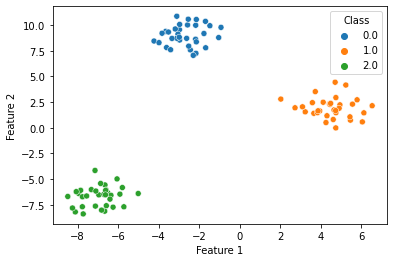

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0,
                  center_box=(- 10.0, 10.0), shuffle=True, random_state=42, return_centers=False)

dataFrameForPlot = pd.DataFrame(np.c_[X, y])
dataFrameForPlot.columns = ["Feature 1", "Feature 2", "Class"]
sns.scatterplot(x = "Feature 1", y = "Feature 2", hue = "Class", palette = "tab10", data = dataFrameForPlot)

vectorOneTest = np.array([[1, 2]])
vectorTwoTest = np.array([[3, 4]])
#answer
def calcEucliDist(vectorOne, vectorTwo):
    return np.linalg.norm(vectorOne-vectorTwo, axis = 1)


calcEucliDist(vectorOneTest, vectorTwoTest)

## Defining an absolute distance function

Define a function called `calcAbsDist()` below. Have it return the absolute differences between two vectors (data points). I think you can work this out yourself now. Instead of taking the L2 norm, you simply take the sum of the absolute differences (L1-norm). This is equal to the Manhattan distance: ![ManhattanVersusEuclidean](ManhattanVersusEuclidean.GIF)

Hint:
* `np.sum()` and `np.abs()` (or give the correct argument to the `linalg.norm` function)

In [3]:
#Answer
def calcAbsDist(vectorOne, vectorTwo):
    #using linalg.norm:
    return np.linalg.norm(vectorOne-vectorTwo, ord = 1, axis = 1)
    #other way:
    #return np.sum(np.abs((vectorOne-vectorTwo)))
calcAbsDist(vectorOneTest, vectorTwoTest)

array([4.])

## Calculating distances between points and cluster centroids

To perform K-means clustering, you want to calculate distances from all samples to the K (initial) centroids, and then assign the point to the centroid closest to it, before calculating that centroid anew, etc. As a first step, say I have 5 centroids to start with. Calculate the Euclidean distance and Manhattan distance from `X[0,:]` to the 5 centroids and print them. Check one of them manually for each metric to make sure this is done correctly!

In [4]:
centroids = np.array([[0,0], [1,5], [3,3], [-8,-5], [6, 2.5]])
print(X[0,:])
#answer
print(calcEucliDist(centroids, X[0,:]))
print(calcAbsDist(centroids, X[0,:]))

[-7.72642091 -8.39495682]
[11.40933302 15.9867223  15.64931776  3.40596202 17.52468873]
[16.12137773 22.12137773 22.12137773  3.66853591 24.62137773]


## Implementing K-means clustering

We are already set to implement K-means clustering ourselves using the functions you defined above. In the code cell below, do the following:

* Define a function `makeKMeanClusters()` that takes in an array X, a number (>0, <len(X)) k, a distance calculating function name, and a number maxIter that you set to 50 unless changed.
* Check that k is valid. If not, throw a warning message and return `None`.
* Sample k random data points from the array X. These will be your initial cluster centroids.
* Loop over the points (or use a list comprehension) and apply your distance function (use globals()). Gather the distance of each data point to each centroid in an array (matrix) of n_datapoints by n_centroids.
* Assign each point a number from 0 to k-1, indicating to which cluster centroid it is closest. You can probably use `np.amin` for this. Use `[:, np.newaxis]` as indexing on the outcome of `np.amin` to get a 2D array that you can compare. If this is entirely abracadabra to your ears, look at the end of the afternoon practical on day 2, where I did a similar thing with `np.amax`.
* Calculate the mean of the data points belonging to each centroid. Use `axis = 0` to calculate the mean by column.
* Set the centroid coordinates to this mean for each centroid. 
* Calculate distances again, etc until the number of iterations is up, or the centroids are not changing anymore (you can save a list with the previous 3 iterations' centroids, and if they are the same (to 4 decimals), you know you can stop. Use `np.array_equal`)
* Return a list with the final cluster centroids as the first element, the centroid each data point is assigned to as the second element, and the initial centroids as the third element.

Hints:
* If you have trouble, first do a 'dry run' without putting things in a function: define the arguments as variables locally (just assign `k=3`, for instance) and walk through all the steps you want to perform.


In [5]:
# answer
def makeKMeanClusters(X, k, funName = "calcEucliDist", maxIter = 50):
    if k <= 0:
        print("K must be greater than 0!")
        return None
    if k > len(X):
        print("K cannot be larger than the # of samples in your data!")
        return None
    if maxIter <= 0:
        print("Cannot have negative or 0 iterations!")
        return None
    
    initialCentroids   = X[np.random.choice(X.shape[0], k, replace=False), :]
    if len(initialCentroids) != k:
        print("Centroids lost!")
    centroids          = initialCentroids
    threeLastCentroids = []
    #print(centroids)
    for i in range(0, maxIter):
        
        threeLastCentroids.append(np.round(centroids, 4))
        distancesToCentroids = np.vstack([globals()[funName](centroids, datapoint) for datapoint in X])
        closestCentroid      = np.where(distancesToCentroids == np.amin(distancesToCentroids,
                                                                        axis = 1)[:, np.newaxis])[1]
        centroids            = np.vstack([np.mean(X[np.where(closestCentroid == clusterNum)],
                                                  axis = 0) for clusterNum in np.unique(closestCentroid)])
        
        if i >2:
            threeLastCentroids.pop(0)
            if np.array_equal(threeLastCentroids[-1],threeLastCentroids[-2]) and np.array_equal(threeLastCentroids[-2], threeLastCentroids[-3]):
                print("No changes in cluster centroids detected in last 3 iterations. Finished at iteration " + str(i+1) + ".")
                break
                
    return [centroids, closestCentroid, initialCentroids]

        
    
    
    
makeKMeanClusters(X, 5)

No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.


[array([[ 4.49951001,  1.93892013],
        [-2.66780392,  8.93576069],
        [-5.82838647, -6.05327088],
        [-7.04084909, -7.80705547],
        [-7.2244203 , -6.12771684]]),
 array([3, 0, 1, 0, 4, 0, 1, 0, 0, 1, 1, 4, 2, 1, 1, 4, 4, 1, 4, 3, 1, 4,
        4, 1, 1, 1, 0, 3, 4, 3, 4, 0, 0, 3, 1, 1, 1, 1, 0, 0, 3, 1, 0, 1,
        1, 0, 4, 4, 4, 0, 0, 0, 1, 4, 2, 4, 1, 1, 0, 1, 3, 0, 3, 0, 4, 3,
        0, 3, 0, 0, 0, 4, 4, 1, 0, 2, 0, 3, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1], dtype=int64),
 array([[ 4.7395302 ,  1.46969403],
        [ 3.22450809,  1.55252436],
        [-5.79657595, -5.82630754],
        [-7.12501531, -7.63384576],
        [-7.32614214, -6.0237108 ]])]

## Plotting your K-means outcome

Let's visualise a clustering into 3 clusters on the data above. Remember, we need multiple iterations of K-means to be able to find a good clustering. We'll work on updating the K-means function to do this automatically below. For now, let's just run the function 20 times and plot all of the outcomes.

Up to you to:
* Make a loop that runs 20 times, within it:
    * Calculate K-means clusters using your function. Set k to 3. Use Euclidean distance.
    * Save the final cluster centroids and the cluster assignments of each point in a list
* Then, make a new figure with matplotlib (`figCluster, axCluster = plt.subplots(5, 4)`).
* Finally, loop over the rows and columns in axCluster, and use `sns.scatterplot` to plot the points in X on it, as well as the cluster centroids, and make sure to colour the points with the cluster they belong to. Here is an example function call: `sns.scatterplot(x = X[:,0], y = X[:,1],hue = finalClusterAssignmentPerIteration[counter], ax = axCluster[row, col], palette = "Set2")`
* Do you see any type of unfortunate clustering that's suboptimal?


No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 7.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids 

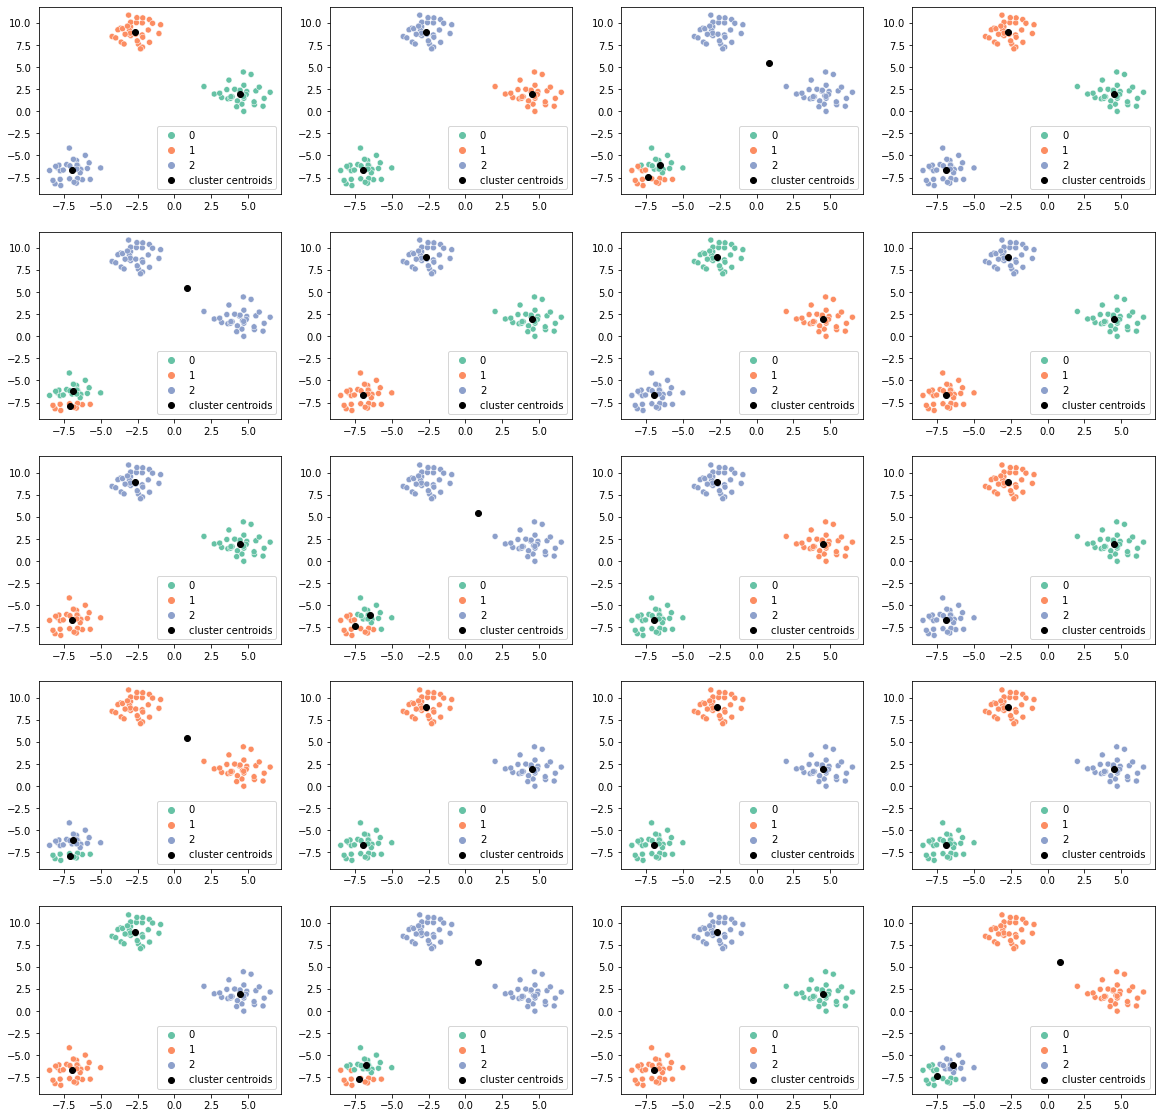

In [6]:
#answer 

finalCentroidsPerIteration         = []
finalClusterAssignmentPerIteration = []
for i in range(0, 20):
    outcome = makeKMeanClusters(X, 3)
    finalCentroidsPerIteration.append(outcome[0])
    finalClusterAssignmentPerIteration.append(outcome[1])

figCluster, axCluster = plt.subplots(5, 4, figsize = (20, 20))
counter = int(0)
for row in range(0, 5):
    for col in range(0, 4):
        sns.scatterplot(x = X[:,0], y = X[:,1],
                        hue = finalClusterAssignmentPerIteration[counter],
                        ax = axCluster[row, col],
                       palette = "Set2")
        #axCluster[row, col].scatter(x = X[:,0], y = X[:,1], c = finalClusterAssignmentPerIteration[counter])
        axCluster[row, col].scatter(x = finalCentroidsPerIteration[counter][:,0],
                                    y = finalCentroidsPerIteration[counter][:,1],
                                    label = "cluster centroids", c = 'black')
        axCluster[row, col].legend()
        counter += 1
    
    

## Pimping the K-means function

As you've probably experienced by now, K-means can return some suboptimal clusterings (given a certain value for K). We could detect this using the dispersion. So, it would be nice to have the function return the dispersion of the clustering as well. In fact, it might be nice to have the function run clustering _n_ times internally, and return the best clustering. Let's change it to do that. The steps we'll have to take:
1. Calculate the dispersion (average squared distance from every datapoint to its cluster's centroid, summed over all centroids)
2. Make a loop in the function, so that it performs clustering, say, 20 times for a given k, and only reports the clustering with the lowest dispersion.

Okay, let's get to work. Up to you to:
* Copy the function from above and add an extra argument `nClusteringsToPerform` that's set to 20 by default
* Calculate the dispersion: the average square distance of every point to its centroid
* Add an outer loop (`range(0, nClusteringsToPerform)`), in it:
    * Perform everything the function did before and calculate the dispersion
    * Compare this dispersion with that of the previous clustering that you saved
    * If it is lower, then accept the new clustering as better.
* Finally, you output the clustering with the lowest dispersion. Add the dispersion to the end of the list you return.

Hints:
* This might be somewhat difficult. You can do something like `for index, centroidNr in enumerate(yourListOfClusterAssignments)`, then for each point, you can calculate `np.square(yourCentroids[centroidNr,:] - X[index, :])`. You can sum these up and multiply with 1 over m to get your result.
* If you can't figure it out after ~10 minutes, feel free (as always) to peek at the answers!



No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 7.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 4.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 5.
No changes in cluster centroids 

Text(0.5, 1.0, 'Distortion: 1.7191')

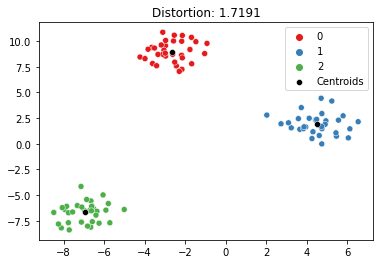

In [7]:



#code to run after changing your function and making the clusters for plotting them:
# clusterOutcome = makeKMeanClusters(X, k = 3)
# fig, ax = plt.subplots()
# sns.scatterplot(x = X[:, 0], y = X[:,1], hue = clusterOutcome[1], palette = "Set1", ax = ax)
# sns.scatterplot(x = clusterOutcome[0][:,0], y = clusterOutcome[0][:,1], color = "black", ax = ax, label = "Centroids")
# ax.set_title("Distortion: " + str(np.round(clusterOutcome[-1], 4)))


#answer

def makeKMeanClusters(X, k, funName = "calcEucliDist", maxIter = 50, nClusteringsToPerform = 20):
    if k <= 0:
        print("K must be greater than 0!")
        return None
    if k > len(X):
        print("K cannot be larger than the # of samples in your data!")
        return None
    if maxIter <= 0:
        print("Cannot have negative or 0 iterations!")
        return None
    
    resultToReturn = [None, None, None, None]
    bestDistortion = np.Inf
    
    for clusteringIndex in range(0, nClusteringsToPerform):
        initialCentroids   = X[np.random.choice(X.shape[0], k, replace=False), :]
        if len(initialCentroids) != k:
            print("Centroids lost!")
        centroids          = initialCentroids
        threeLastCentroids = []
        #print(centroids)
        for i in range(0, maxIter):

            threeLastCentroids.append(np.round(centroids, 4))
            distancesToCentroids = np.vstack([globals()[funName](centroids, datapoint) for datapoint in X])
            closestCentroid      = np.where(distancesToCentroids == np.amin(distancesToCentroids,
                                                                            axis = 1)[:, np.newaxis])[1]
            centroids            = np.vstack([np.mean(X[np.where(closestCentroid == clusterNum)],
                                                      axis = 0) for clusterNum in np.unique(closestCentroid)])

            if i >2:
                threeLastCentroids.pop(0)
                if np.array_equal(threeLastCentroids[-1],threeLastCentroids[-2]) and np.array_equal(threeLastCentroids[-2], threeLastCentroids[-3]):
                    print("No changes in cluster centroids detected in last 3 iterations. Finished at iteration " + str(i+1) + ".")
                    break
        
        # new code
        squareDistancesPerPoint = []
        for index, centroid in enumerate(closestCentroid):
            squareDistancesPerPoint.append(np.square(centroids[centroid, :] - X[index, :]))
        distortion = 1/len(X) * np.sum(np.array(squareDistancesPerPoint))
        
        if distortion < bestDistortion:
            bestDistortion = distortion
            resultToReturn = [centroids, closestCentroid, initialCentroids, bestDistortion]
                
    return resultToReturn

clusterOutcome = makeKMeanClusters(X, k = 3)

fig, ax = plt.subplots()
sns.scatterplot(x = X[:, 0], y = X[:,1], hue = clusterOutcome[1], palette = "Set1", ax = ax)
sns.scatterplot(x = clusterOutcome[0][:,0], y = clusterOutcome[0][:,1], color = "black", ax = ax, label = "Centroids")
ax.set_title("Distortion: " + str(np.round(clusterOutcome[-1], 4)))

## Applying your algorithm to a larger dataset

Now you're ready to rock. Let's get a more difficult dataset with 15 clusters that are a bit more spread out, and see what K-means makes of it. Up to you to cluster it with a k from 2 to 25 and see what the clusters look like and what happens to the distortion. Set `nClusteringsToPerform` to 10. Use the plotting code from above. If you'd use distortion as an optimality criterion, what would be the optimal number of clusters?

No changes in cluster centroids detected in last 3 iterations. Finished at iteration 14.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 18.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 9.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 15.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 13.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 11.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 8.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 11.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 6.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 9.
No changes in cluster centroids detected in last 3 iterations. Finished at iteration 10.
No changes in cluster cen

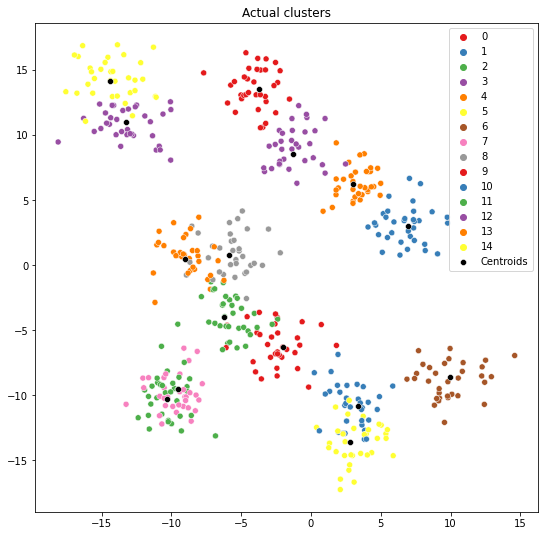

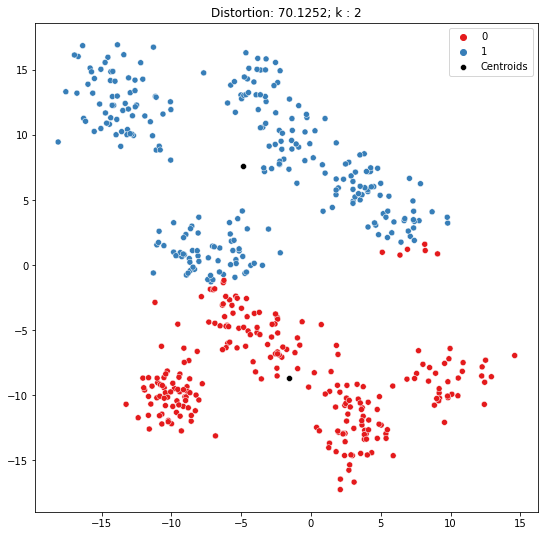

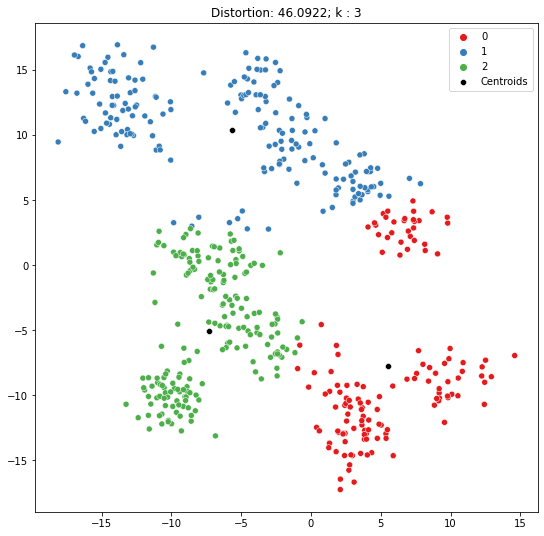

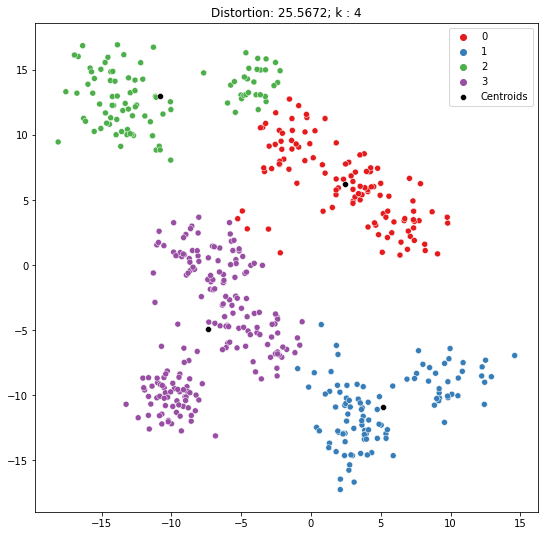

In [18]:
X, y, centers = make_blobs(n_samples=500, n_features=2, centers=15, cluster_std=1.5,
                  center_box=(- 15.0, 15.0), shuffle=True, random_state=42, return_centers=True)

#plot the actual clusters as generated
fig, ax = plt.subplots(figsize = (9,9))
sns.scatterplot(x = X[:, 0], y = X[:,1], hue = y, palette = "Set1", ax = ax)
sns.scatterplot(x = centers[:,0], y = centers[:,1], color = "black", ax = ax, label = "Centroids")
ax.set_title("Actual clusters")

#your answer here:

#answer
for k in range (2, 26):
    clusterOutcome = makeKMeanClusters(X, k = k, nClusteringsToPerform = 10)
    fig, ax = plt.subplots(figsize = (9,9))
    sns.scatterplot(x = X[:, 0], y = X[:,1], hue = clusterOutcome[1], palette = "Set1", ax = ax)
    sns.scatterplot(x = clusterOutcome[0][:,0], y = clusterOutcome[0][:,1], color = "black", ax = ax, label = "Centroids")
    ax.set_title("Distortion: " + str(np.round(clusterOutcome[-1], 4)) + "; k : " + str(k))
    #fig.show()

## The end

Congratulations, you've succesfully implemented K-means clustering yourself. Not too shabby! Some important takeaways:
* For a given K, the clustering is not unique: it depends on the initialisation. So you need to do multiple clusterings, and can take the best one according to the distortion. However, you might imagine that in a dataset with millions of points with 50 dimensions doing the clustering multiple times is computationally prohibitive. Therefore it is important to optimise the 'random' initial centroids or seed centroids. This is a whole subfield.
* You cannot say what the best K to cluster a certain dataset is, except for a necessary downstream purpose. If you perform single cell sequencing and know that there are 5 experimental conditions in your sample, then it'd be natural to look for 5 clusters to work with in further analysis. However, it could be that if you choose 6 clusters you find some cluster of cells with aberrant responses in a certain condition. There is no correct clustering, it is always a dialogue with the data, a process. Not some step you just do and then move on (ideally).
* According to distortion, the best clustering is one where K = len(data), i.e. where there is no clustering at all. Then it will be minimal, at 0, as the distance from each point to itself (its cluster centroid) is 0. Not useful!

## Survey
[Live, Laugh, Let me know what you thought](https://docs.google.com/forms/d/e/1FAIpQLSf5awSIxrIkj2FBp0YDdvZkRd7dqZrAZ4n-X5kJVeeFkuf5Eg/viewform?usp=sf_link)
